## Visualizando las Mejores 10,000 Películas de IMDB


Este conjunto de datos se ha extraído de Kaggle, una plataforma conocida por su comunidad de entusiastas del análisis de datos y el aprendizaje automático.

Aquí, te presentamos una breve descripción del conjunto de datos proporcionada por su creador:

Adéntrate en las complejidades del séptimo arte con este conjunto de datos, que presenta una lista exhaustiva de las películas mejor valoradas en IMDB. Desde las calificaciones y votos hasta los resultados financieros de las películas, este conjunto de datos abarca una amplia gama de factores. Ofrece una visión profunda de las métricas que definen el éxito de una película y su lugar en la historia del cine.

**A**

**Exploración de Datos**

In [43]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('movies.csv')
df.head(5)

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN


In [44]:

# Define una función para analizar valores faltantes
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Llama a la función y almacena el resultado en una variable
missing_info = missing_data(df)

# Muestra la información sobre valores faltantes
print(missing_info)


             Total    Percent
gross         2834  28.774495
metascore     1973  20.032491
certificate    356   3.614580
title            0   0.000000
year             0   0.000000
runtime          0   0.000000
genre            0   0.000000
director         0   0.000000
stars            0   0.000000
rating           0   0.000000
votes            0   0.000000


**B**  

**Limpieza y Transformación de Datos**

In [45]:
# Filtra el DataFrame para eliminar los años especificados
years_to_remove = ['1915', '1916', '1917', '1918', '1919', "2021", "2022", "2023"]
df = df[~df['year'].isin(years_to_remove)]

# 1. Elimina caracteres no numéricos de una cadena en la columna 'year'
def remove_non_numeric_characters(string):
    return re.sub('[^0-9]', '', string)

# Aplica la función 'remove_non_numeric_characters' a la columna 'year'
df['year'] = df['year'].apply(remove_non_numeric_characters)

# 2. Calcula la mediana de los ingresos ('gross') para cada 'año' único
median_revenue_by_year = df.groupby('year')['gross'].median()

# 3. Itera a través del DataFrame para llenar los valores faltantes de ingresos 'gross'
for index, row in df.iterrows():
    if pd.isnull(row['gross']):
        df.at[index, 'gross'] = median_revenue_by_year.get(row['year'], None)

# Muestra las primeras filas del DataFrame modificado
df.head()



,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,24.76
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,12.48
5,The Dark Knight,2008,152,PG-13,"Action, Crime, Drama","['Christopher Nolan', 'Christian Bale', 'Heath...","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",9.0,84.0,2758250,534.86


**Limpieza de los géneros**

In [46]:
print("Number of subgenres")
print(df['genre'].nunique())
print("")
print(df['genre'].value_counts().head(5))

Number of subgenres
417

Comedy, Drama, Romance    460
Drama                     393
Comedy, Drama             383
Drama, Romance            322
Action, Crime, Drama      299
Name: genre, dtype: int64


In [47]:
df['genre'] = df['genre'].str.split().str[0]
df['genre'].value_counts().head(5)

Comedy,       2152
Action,       2138
Drama,        1515
Crime,         760
Biography,     544
Name: genre, dtype: int64

In [48]:
#Le quito las comas a quienes les quedó
df['genre'] = df['genre'].str.replace(',','')
df['genre'].value_counts().head(50)

Comedy       2397
Action       2142
Drama        1908
Crime         760
Biography     544
Adventure     517
Horror        442
Animation     434
Fantasy        56
Mystery        36
Thriller       16
Sci-Fi          9
Film-Noir       8
Family          4
Western         3
Romance         3
Musical         2
Music           1
History         1
Name: genre, dtype: int64

**C**

**EDA y Visualización de Datos**

**Histograma de la distribución de los ranking**

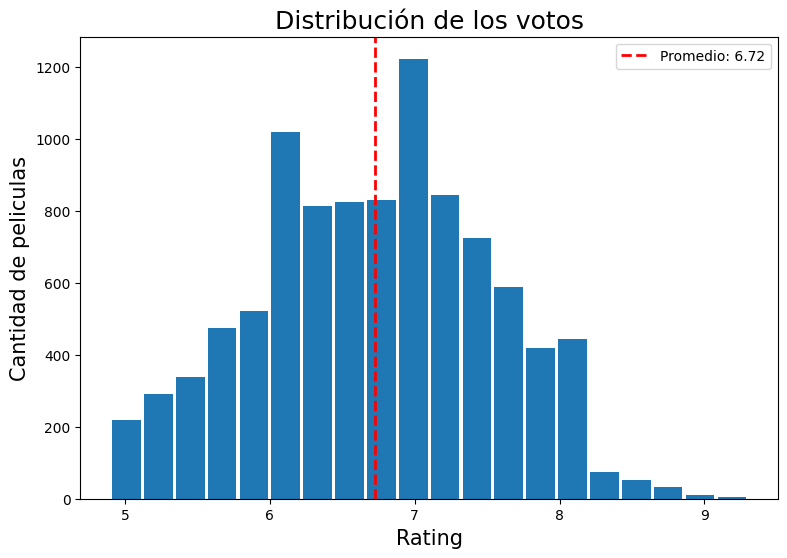

In [6]:
# Configurar estilos y tamaños de fuente
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiqueta del eje x
plt.xlabel('Rating', fontsize=15)
# Etiqueta del eje y
plt.ylabel('Cantidad de peliculas', fontsize=15)
# Título del gráfico
plt.title('Distribución de los votos', fontsize=18)

# Crear histograma de vote_average
plt.hist(df['rating'], bins=20, rwidth=0.9)

# Calcular el promedio de las calificaciones
promedio_calificaciones = df['rating'].mean()

# Agregar el promedio como una línea vertical en el gráfico
plt.axvline(promedio_calificaciones, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {promedio_calificaciones:.2f}')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


Se contempla que el promedio es 6,72 y que el valor más frecuente del ranking es 7.
Pocas películas poseen un valor superior a 8.2.

**Evolución Anual del Número de Películas Lanzadas (1915-2022)**

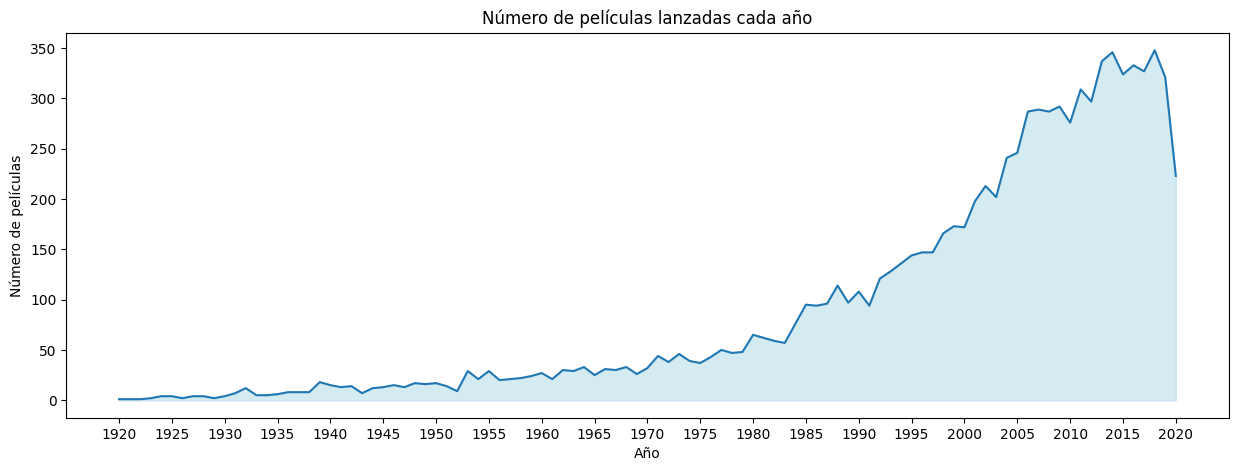

In [40]:

# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Calcular el número de películas lanzadas por año y resetear el índice
movies_released = df.groupby('year').size().reset_index(name='count')

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=movies_released, x='year', y='count', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(movies_released['year'], movies_released['count'], color='lightblue', alpha=0.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2022 - 1920, 5))

# Establecer título y etiquetas de los ejes
plt.title('Número de películas lanzadas cada año')
plt.ylabel('Número de películas')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()


Se puede observar un crecimiento sostenido a lo largo del tiempo, siendo más pronunciado a partir de la década de los 90. 

Sin embargo, la pandemia provocó un descenso significativo.






**Ingresos Brutos Totales por Año**

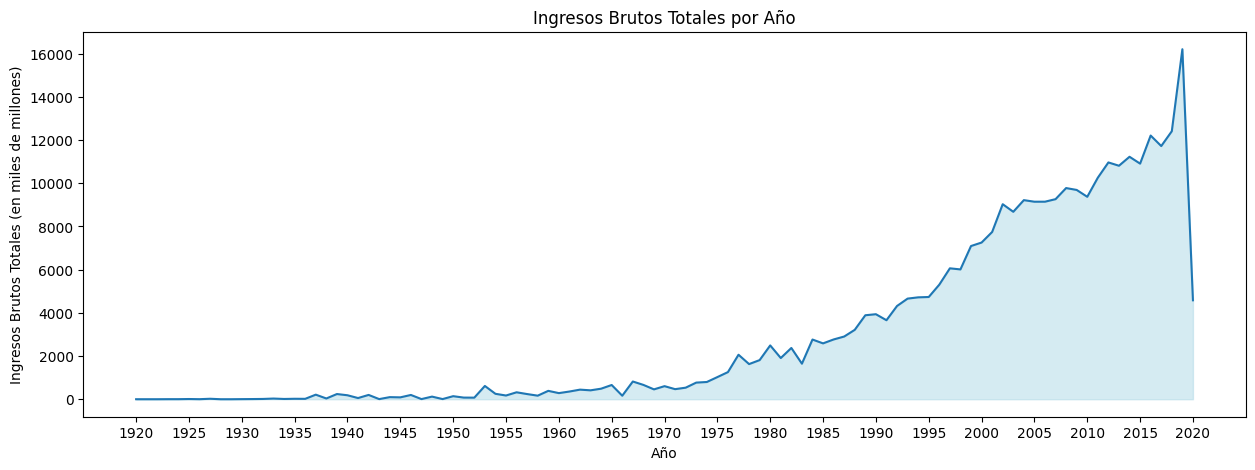

In [41]:


# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Calcular el total de ingresos brutos por año y resetear el índice
total_gross_by_year = df.groupby('year')['gross'].sum().reset_index(name='total_gross')

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=total_gross_by_year, x='year', y='total_gross', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(total_gross_by_year['year'], total_gross_by_year['total_gross'], color='lightblue', alpha=0.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2023 - 1920, 5))

# Establecer título y etiquetas de los ejes
plt.title('Ingresos Brutos Totales por Año')
plt.ylabel('Ingresos Brutos Totales (en miles de millones)')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()


Un gráfico muy similar al anterior pero en donde se contempla el gigantezco crecimiento en los ingresos brutos en la industria, con el golpe muy duro producido por la pandemia

**Promedio de Ingresos Brutos por Género**

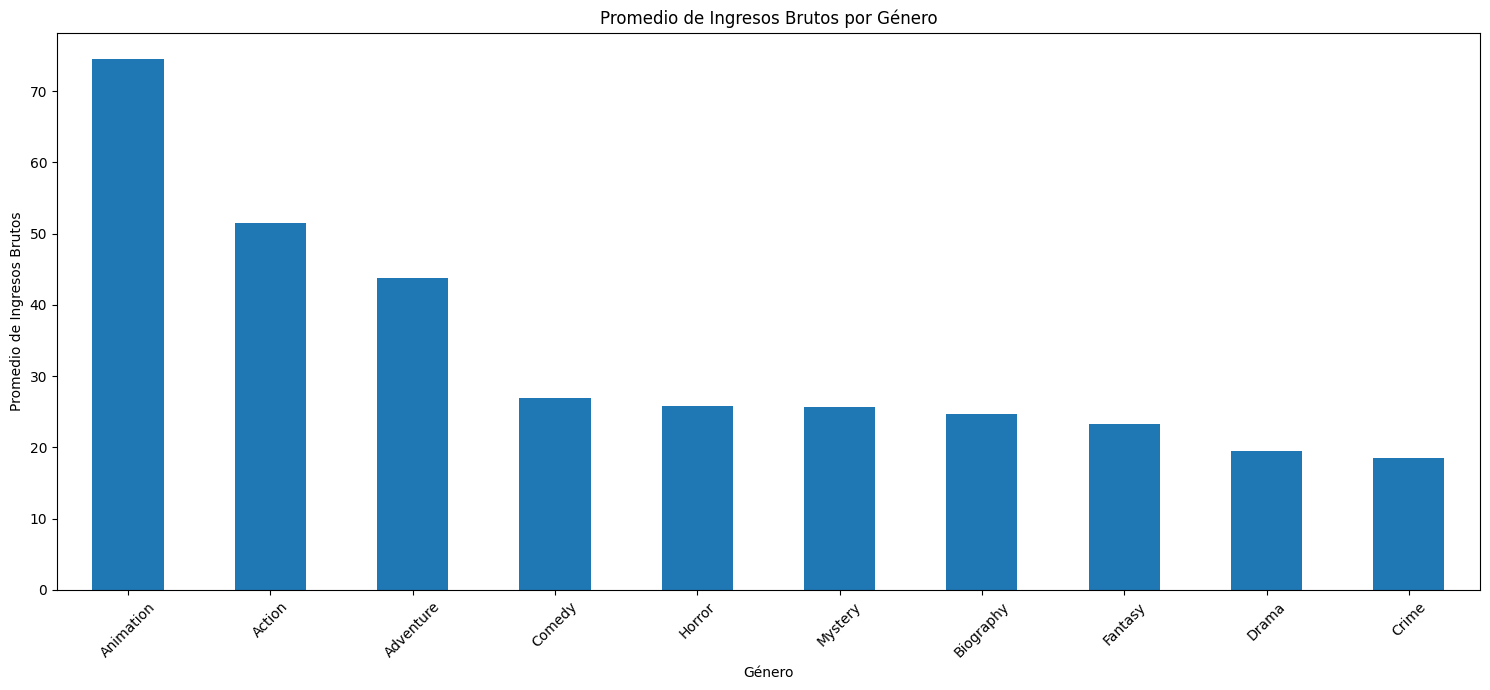

In [49]:

# Filtrar películas con ingresos brutos no nulos
df_filtered = df[df['gross'].notna()]

# Obtener los 10 géneros más comunes
top_10_genres = df_filtered['genre'].str.split(',').explode().value_counts().head(10).index

# Filtrar el DataFrame para incluir solo los géneros más comunes
df_filtered = df_filtered[df_filtered['genre'].str.split(',').explode().isin(top_10_genres)]

# Calcular el promedio de ingresos brutos por género
average_gross_by_genre = df_filtered.groupby('genre')['gross'].mean().sort_values(ascending=False)

# Crear un gráfico de barras
fig, axes = plt.subplots(figsize=(15, 7))
average_gross_by_genre.plot(kind='bar', ax=axes)

# Establecer título y etiquetas de los ejes
plt.title('Promedio de Ingresos Brutos por Género')
plt.ylabel('Promedio de Ingresos Brutos')
plt.xlabel('Género')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En este gráfico se pueden observar los géneros más taquilleros y que suelen aparecer en la pantalla grande.

El género de la animación possee un promedio muy superior al resto, seguido por la acción y la aventura. 

El resto se encuentran en valor más cercanos a los 20 millones por pelicula.

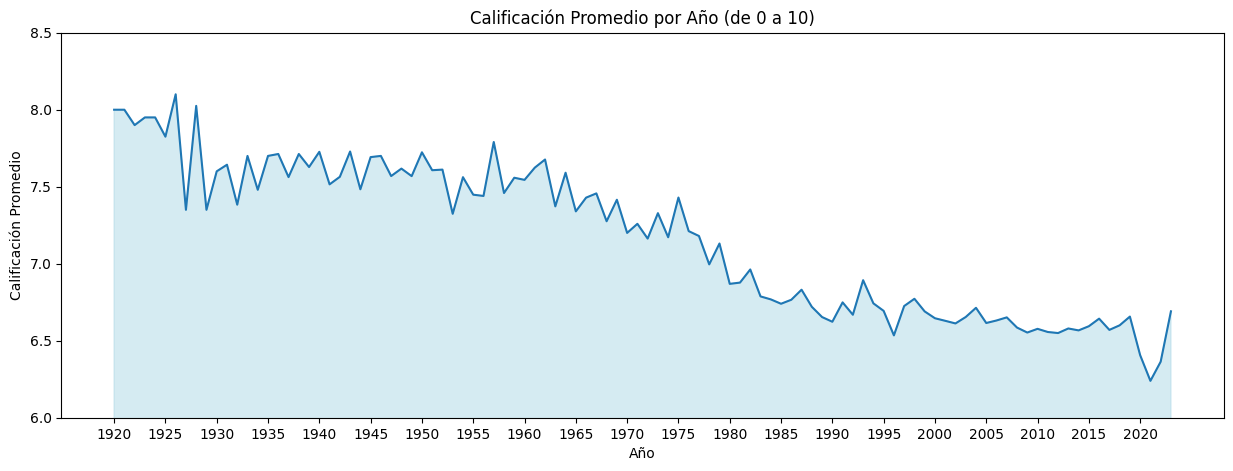

In [50]:

# Calcular la calificación promedio por año y resetear el índice
ave_rating_by_year = df.groupby('year')['rating'].mean().reset_index(name='mean')

# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=ave_rating_by_year, x='year', y='mean', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(ave_rating_by_year['year'], ave_rating_by_year['mean'], color='lightblue', alpha=0.5)

# Establecer los límites del eje y
axes.set_ylim(6, 8.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2023 - 1920, 5))


# Establecer título y etiquetas de los ejes
plt.title('Calificación Promedio por Año (de 0 a 10)')
plt.ylabel('Calificación Promedio')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()



**Ranking Promedio por década**

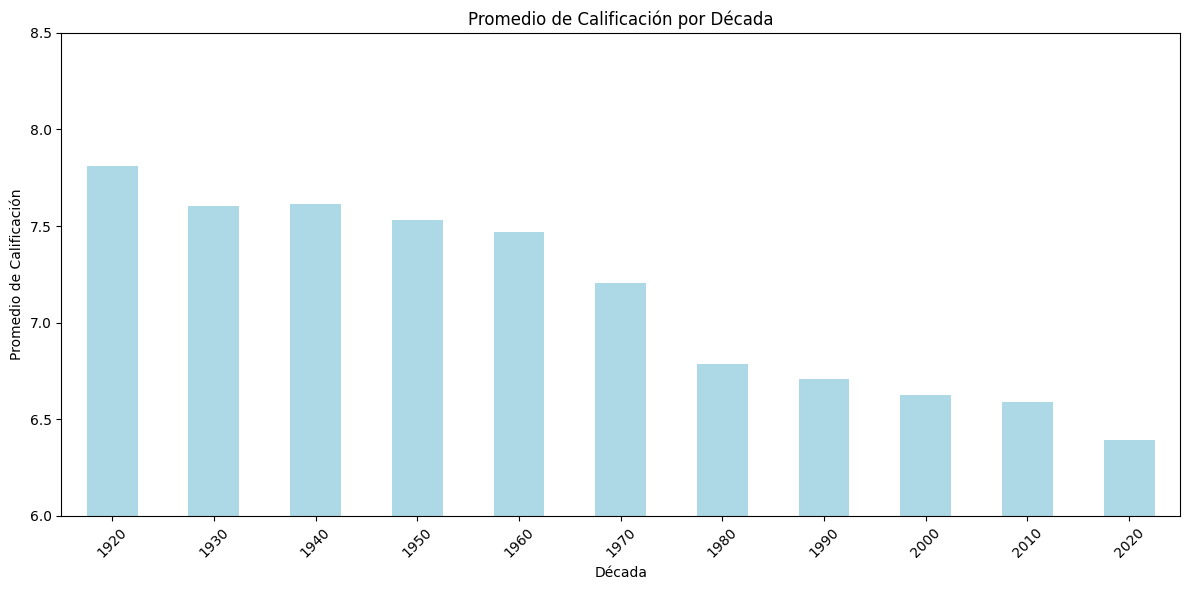

In [51]:
# Asegurarse de que la columna 'year' esté en formato numérico
df['year'] = df['year'].astype(int)

# Crear una columna para representar la década
df['decade'] = (df['year'] // 10) * 10

# Calcular el promedio de calificación por década
average_rating_by_decade = df.groupby('decade')['rating'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
average_rating_by_decade.plot(kind='bar', color='lightblue')

# Establecer título y etiquetas de ejes
plt.title('Promedio de Calificación por Década')
plt.xlabel('Década')
plt.ylabel('Promedio de Calificación')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Establecer los límites del eje y
plt.ylim(6, 8.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El promedio cae década tras década. La cantidad de peliculas ha aumentado pero sus valores han disminuido con claridad.

A partir de la década del 80, el descenso es aún más marcado.

**Cantidad de peliculas por género**

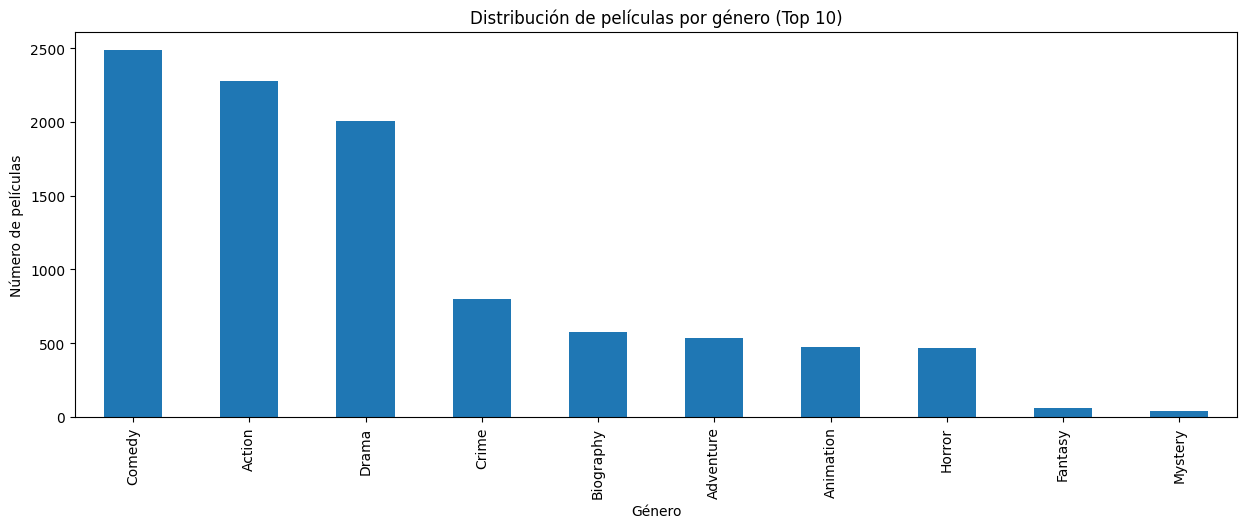

In [21]:
# Gráfico de barras para visualizar la distribución de las películas por género
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Obtener los 10 primeros géneros más comunes
top_10_generos = df['genre'].str.split(',').explode().value_counts().head(10)
top_10_generos.plot(kind='bar', ax=axes)

plt.title('Distribución de películas por género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Número de películas')

# Mostrar el gráfico
plt.show()

Los 3 principales géneros son Comedia, Acción y Drama.

Muy por debajo se encuentran el resto.

En este gráfico solo se muestran los 10 primeros géneros.

**Géneros más frecuentes en cada década**

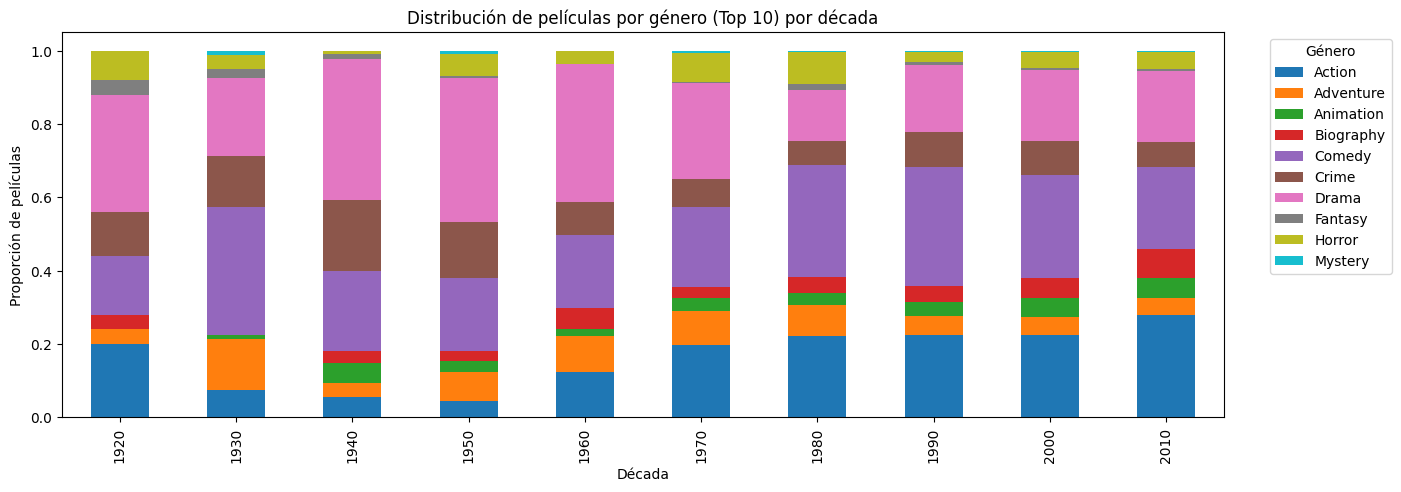

In [52]:

# Asegurarse de que la columna 'year' esté en formato numérico
df['year'] = df['year'].astype(int)

# Crear una columna para representar la década
df['decade'] = (df['year'] // 10) * 10

# Filtrar por géneros más comunes
top_10_generos = df['genre'].str.split(',').explode().value_counts().head(10).index

# Gráfico de barras para visualizar la distribución de las películas por género por década (con filtro)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Obtener la distribución de películas por género para cada década (con filtro)
distribucion_generos_por_decada = df[df['genre'].str.split(',').explode().isin(top_10_generos)]
distribucion_generos_por_decada = distribucion_generos_por_decada.groupby(['decade', 'genre'])['genre'].count().unstack().fillna(0).applymap(int)
distribucion_generos_por_decada = distribucion_generos_por_decada.divide(distribucion_generos_por_decada.sum(axis=1), axis=0).head(10)
distribucion_generos_por_decada.plot(kind='bar', stacked=True, ax=axes)

plt.title('Distribución de películas por género (Top 10) por década')
plt.xlabel('Década')
plt.ylabel('Proporción de películas')
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()


Este gráfico es muy interesante para ver los cambios que se han producido en cada década en relación a los géneros.

Por ejemplo se puede contemplar que el género de acción ha estado aumentando en cada década. Mientras que la comedia y el drama están disminuyendo.

También puede verse que el género Biografico aumentó en la última década registrada.

**Ranking por Genero**

<Figure size 640x480 with 0 Axes>

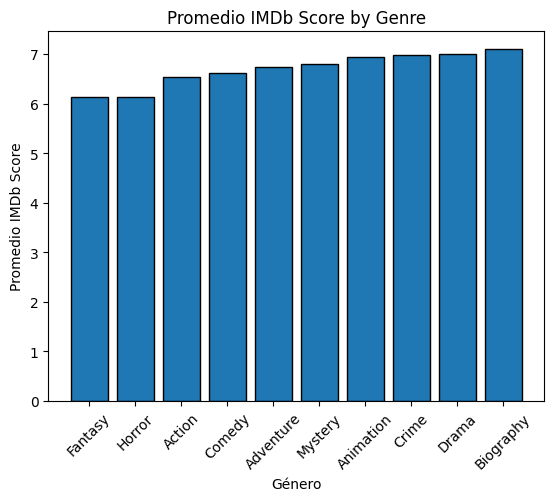

In [56]:
fig=plt.figure()

top_genres = df["genre"].value_counts().head(10)

genres_data = df[df["genre"].isin(top_genres.index)].groupby("genre")["rating"].mean().sort_values()

fig, ax = plt.subplots()
ax.bar(genres_data.index, genres_data.values, edgecolor='black')
ax.set_title('Promedio IMDb Score by Genre')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio IMDb Score')
fig.set_facecolor("white")
plt.xticks(rotation=45)

plt.show()

Podemos ver los ranking de los 10 principales géneros, donde la Biografía posee el mayor promedio de ranking y el terror se encuentra en el último puesto.

**Ranking por género en un diagrama de Box**

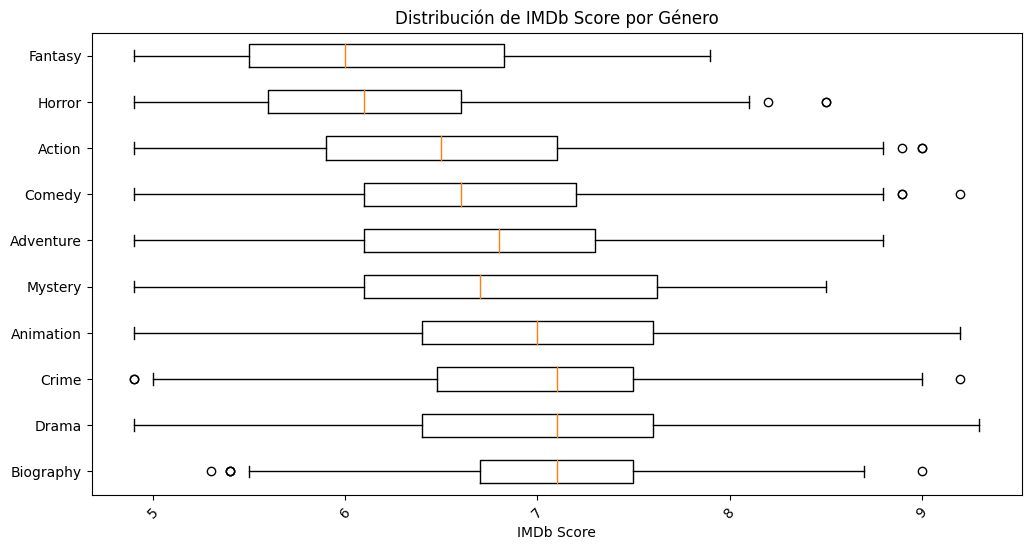

In [57]:

# Filtrar las películas por los 10 géneros más comunes
top_genres = df["genre"].value_counts().head(10)
filtered_df = df[df["genre"].isin(top_genres.index)]

# Calcular el promedio del IMDb Score por género y ordenarlos de mejor a peor
genre_ratings = filtered_df.groupby('genre')['rating'].mean().sort_values(ascending=False)
sorted_genres = genre_ratings.index

# Crear una lista ordenada de DataFrames por género
dataframes_por_genero = [filtered_df[filtered_df['genre'] == genre] for genre in sorted_genres]

# Crear un gráfico de cajas ordenado
plt.figure(figsize=(12, 6))
plt.boxplot([df['rating'] for df in dataframes_por_genero], vert=False)
plt.title('Distribución de IMDb Score por Género')
plt.xlabel('IMDb Score')
plt.yticks(range(1, len(sorted_genres) + 1), sorted_genres)
plt.xticks(rotation=45)

plt.show()



En este gráfico contamos con mayor información, podemos ver la disparidad que posee cada género en relación al ranking.

**Sistema de calificaciones de peliculas**

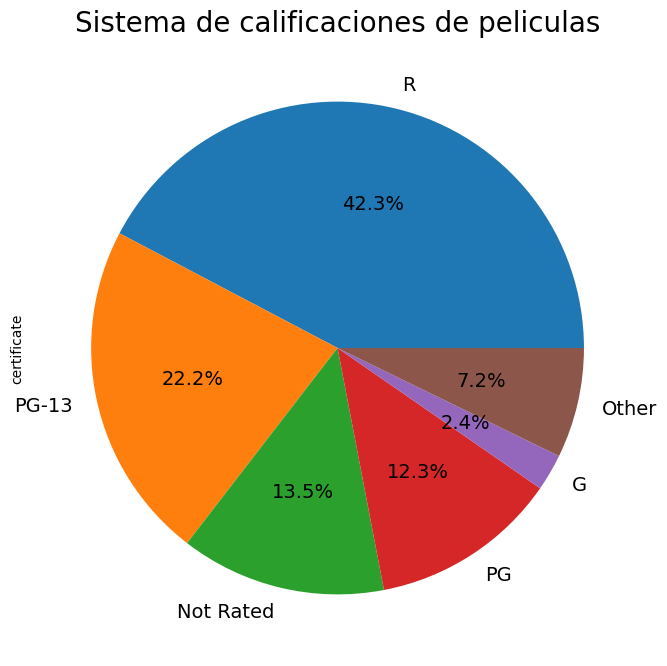

In [59]:
# Pie chart to visualize the distribution of movies by certificate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.set_facecolor('#FFFFFF')

certificate_counts = df['certificate'].value_counts()

# Label others for better visualization
threshold = 200 # 5%
main_genres = certificate_counts[certificate_counts >= threshold].index
other_genres = certificate_counts[certificate_counts < threshold]
genre_counts_combined = certificate_counts.copy()
genre_counts_combined = genre_counts_combined[main_genres]
genre_counts_combined['Other'] = other_genres.sum()
genre_counts_combined.plot(kind='pie', y='count',  ax=axes, autopct='%1.1f%%', shadow=False, legend = False, fontsize=14)

plt.title('Sistema de calificaciones de peliculas', fontsize=20)
plt.show()

En este gráfico se contemplan la distribución en el sistema de calificación, en donde la categoría R es la más frecuente (Los menores de 17 años deben estar acompañados por un adulto o tutor legal).

Luego continua con PG-13 (Se recomienda la precaución de los padres o adultos).

Hay muchas peliculas Not Rated, pueden ser peliculas antiguas o extranjeras que no pasaron bajo el proceso de calificación de USA.

**Sistema de calificación por década**

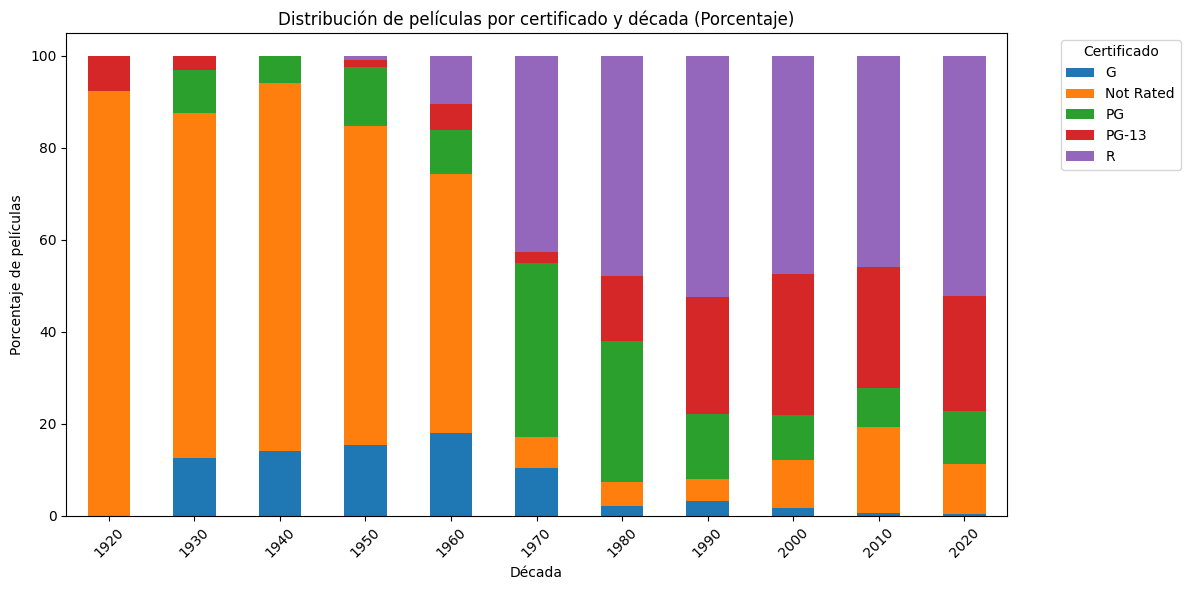

In [58]:

# Asegurarse de que la columna 'year' esté en formato numérico
df['year'] = df['year'].astype(int)

# Crear una columna para representar la década
df['decade'] = (df['year'] // 10) * 10

# Obtener los certificados más comunes
threshold = 200  # Umbral de 200 películas para considerar como "Other"
certificate_counts = df['certificate'].value_counts()
main_certificates = certificate_counts[certificate_counts >= threshold].index

# Filtrar el DataFrame para incluir solo los certificados más comunes y las décadas
df_filtered = df[df['certificate'].isin(main_certificates)]

# Calcular la proporción de películas por certificado y década
certificate_proportions_by_decade = (df_filtered.groupby(['decade', 'certificate']).size() / df_filtered.groupby('decade').size()).unstack(fill_value=0) * 100

# Crear un gráfico de barras apiladas
fig, axes = plt.subplots(figsize=(12, 6))
certificate_proportions_by_decade.plot(kind='bar', stacked=True, ax=axes)

# Establecer título y etiquetas de ejes
plt.title('Distribución de películas por certificado y década (Porcentaje)')
plt.xlabel('Década')
plt.ylabel('Porcentaje de películas')
plt.xticks(rotation=45)
plt.legend(title='Certificado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Hasta la década del 70, la gran mayoría de las peliculas no pasaban por el sístema de calificación.

En el año de 1968 se creó el Sistema de Clasificación de Películas de la MPA y la mayoría de las películas han sido calificadas desde entonces.



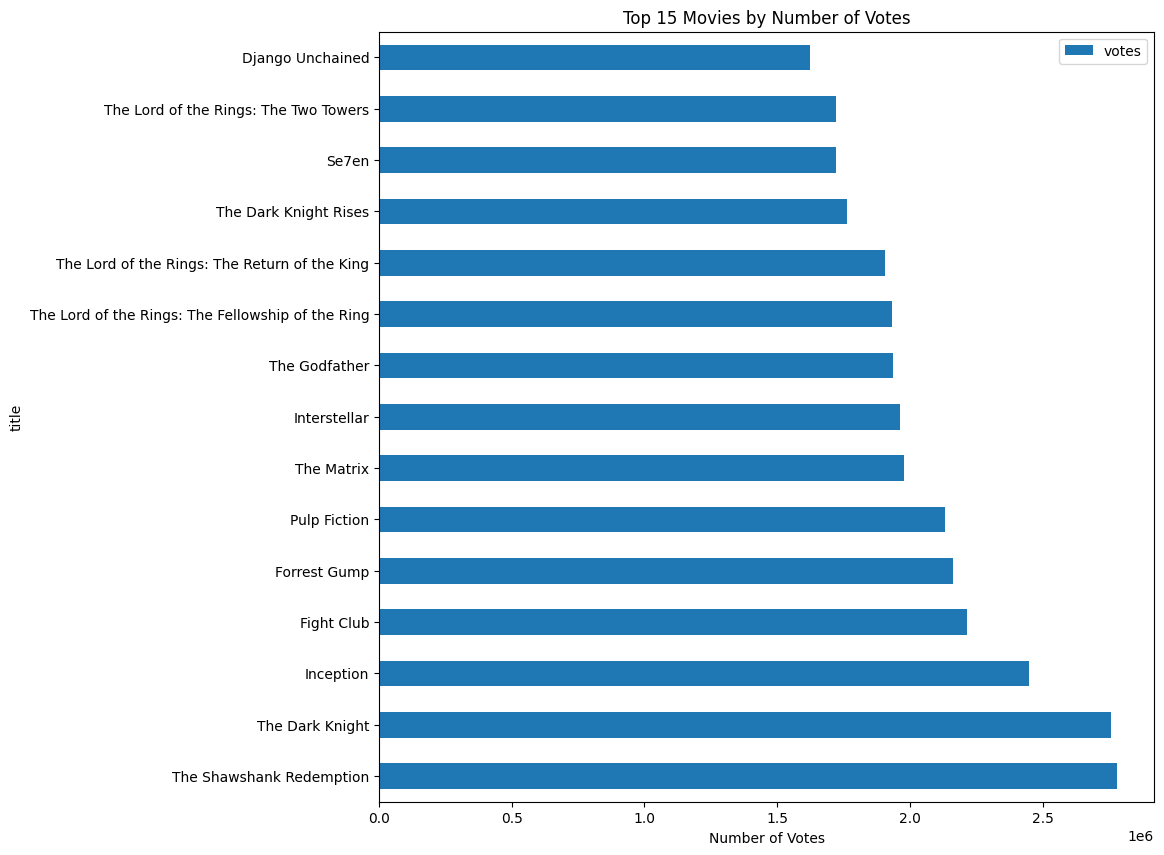

In [10]:
# Order by number of votes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
votes = df.sort_values('votes', ascending=False)
votes[:15].plot(kind='barh', x='title', y='votes', ax=axes)
plt.xlabel('Number of Votes')
plt.title('Top 15 Movies by Number of Votes')
plt.show()

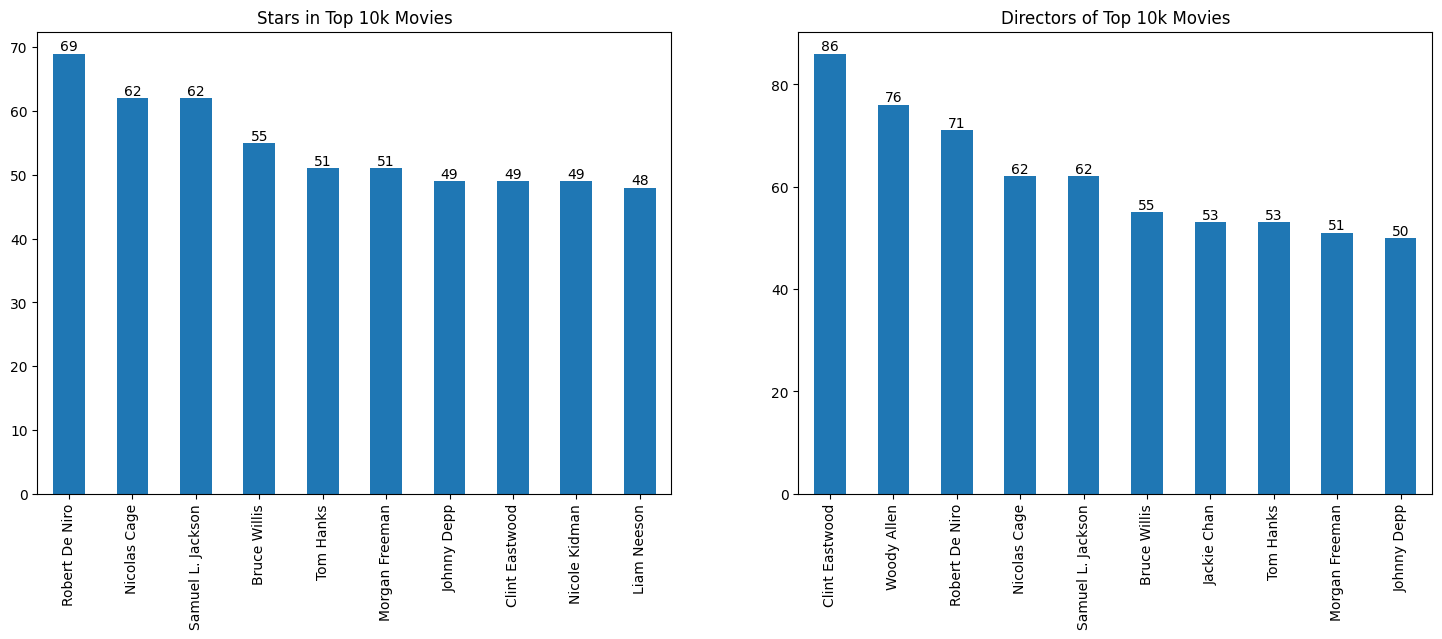

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Stars that appear in the most movies in top 10k movies
import ast
# Convert the string representation of lists to actual lists
stars_col = df['stars'].apply(ast.literal_eval)
all_stars = [star for stars in stars_col for star in stars]
star_counts = pd.Series(all_stars).value_counts()
star_counts[:10].plot(kind='bar', ax=axes[0], title='Stars in Top 10k Movies')

# Directors that appear in the most movies in top 10k movies
directors_col = df['director'].apply(ast.literal_eval)
all_directors = [director for directors in directors_col for director in directors]
director_counts = pd.Series(all_directors).value_counts()
director_counts[:10].plot(kind='bar', ax=axes[1], title='Directors of Top 10k Movies')

axes[0].bar_label(axes[0].containers[0])
axes[1].bar_label(axes[1].containers[0])
plt.show()

del all_stars, star_counts, all_directors, director_counts

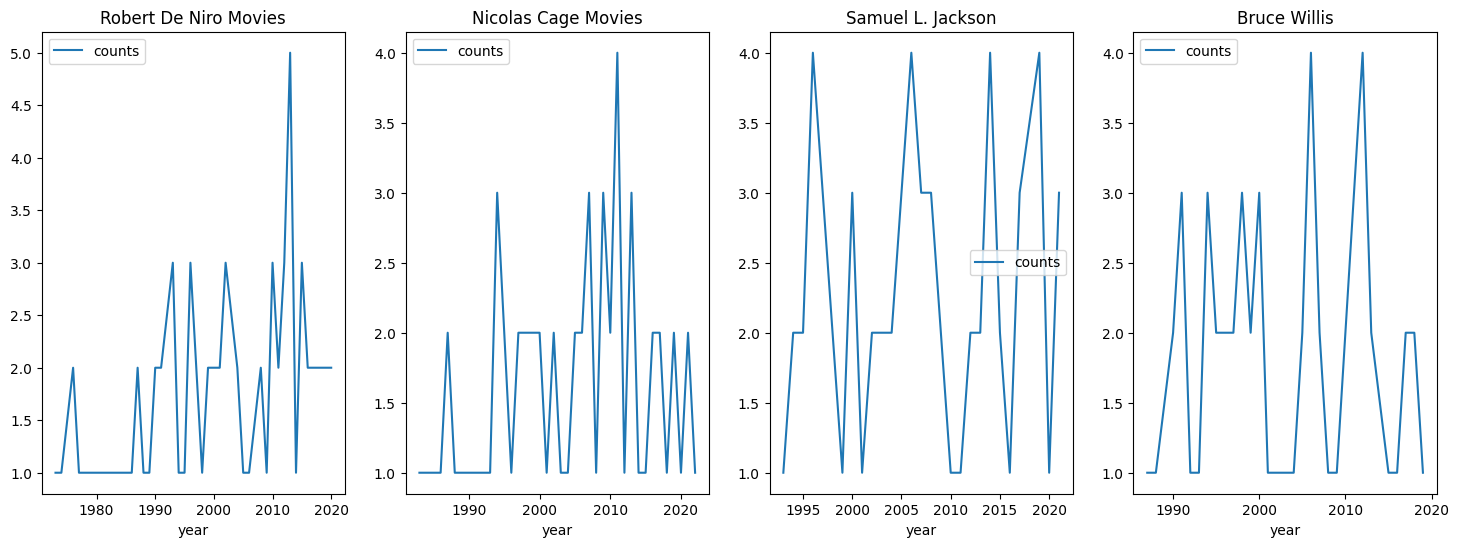

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

stars_occurances1 = df[df['stars'].str.contains('Robert De Niro')]
stars_occurances1_by_year = stars_occurances1.groupby('year').size().reset_index(name='counts')
stars_occurances1_by_year.plot(kind='line', x='year', y='counts', title='Robert De Niro Movies', ax=axes[0])

stars_occurances2 = df[df['stars'].str.contains('Nicolas Cage')]
stars_occurances2_by_year = stars_occurances2.groupby('year').size().reset_index(name='counts')
stars_occurances2_by_year.plot(kind='line', x='year', y='counts', title='Nicolas Cage Movies', ax=axes[1])

stars_occurances3 = df[df['stars'].str.contains('Samuel L. Jackson')]
stars_occurances3_by_year = stars_occurances3.groupby('year').size().reset_index(name='counts')
stars_occurances3_by_year.plot(kind='line', x='year', y='counts', title='Samuel L. Jackson', ax=axes[2])

stars_occurances4 = df[df['stars'].str.contains('Bruce Willis')]
stars_occurances4_by_year = stars_occurances4.groupby('year').size().reset_index(name='counts')
stars_occurances4_by_year.plot(kind='line', x='year', y='counts', title='Bruce Willis', ax=axes[3])

plt.show()

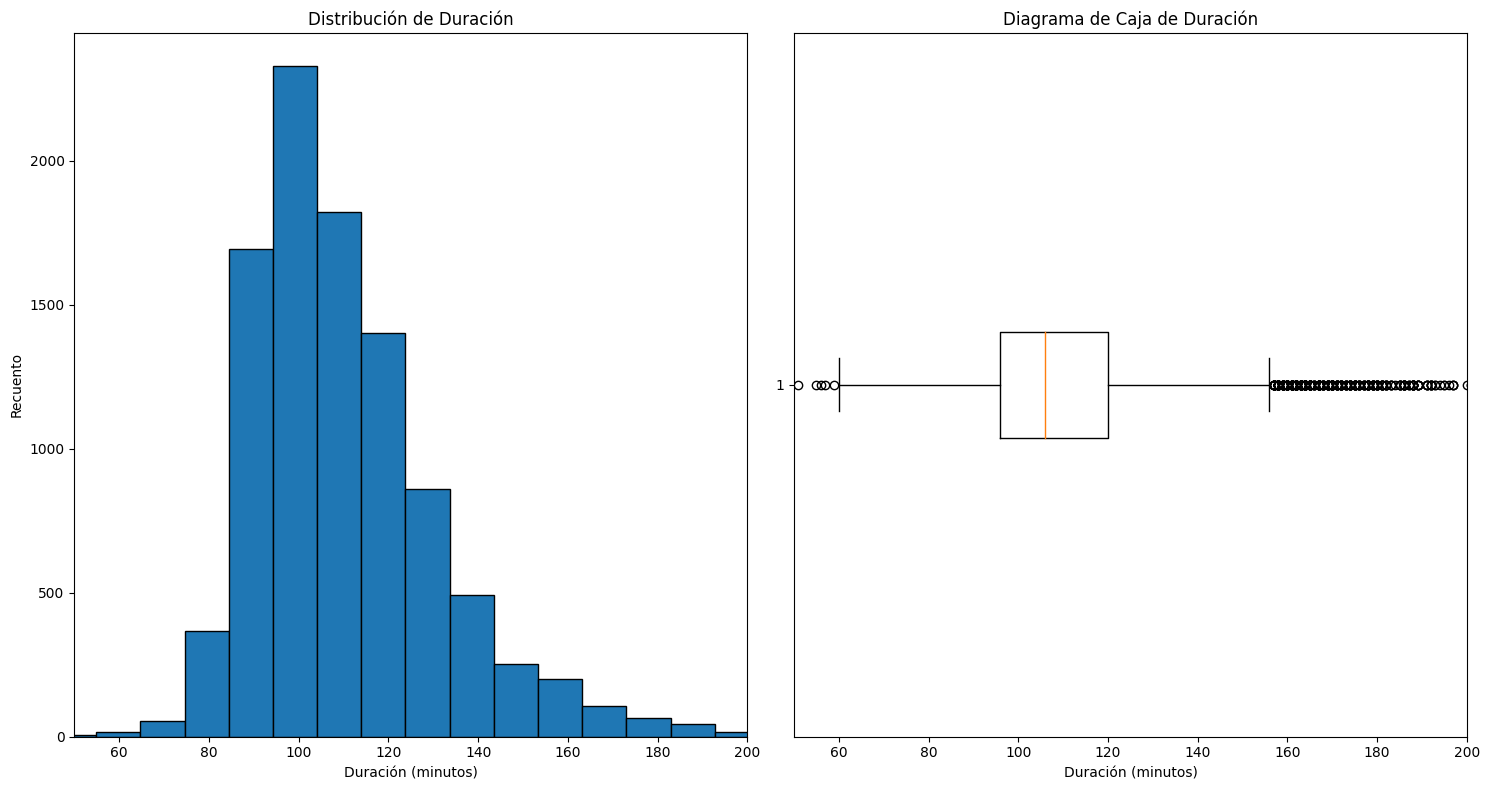

In [34]:
# Crear una nueva figura y una cuadrícula de subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Histograma
ax1.hist(df['runtime'], bins=40, edgecolor='black')
ax1.set_title('Distribución de Duración')
ax1.set_xlabel('Duración (minutos)')
ax1.set_ylabel('Recuento')

# Establecer límites del eje x para el histograma
ax1.set_xlim(50, 200)

# Gráfico de caja
ax2.boxplot(df['runtime'], vert=False)
ax2.set_title('Diagrama de Caja de Duración')
ax2.set_xlabel('Duración (minutos)')
ax2.set_xlim(50, 200)


plt.tight_layout()  # Ajustar espaciado entre subgráficos
plt.show()
